In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox, norm, ks_2samp
from scipy.stats import shapiro, ks_2samp
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import aux_functions_ml as f

In [3]:
df_high_demand_A = pd.read_csv('../Datasets/all_predictions_high_demand_A.csv', index_col=0)
df_products = pd.read_csv('../Datasets/clean_products.csv', index_col=0)
df_orders = pd.read_csv('../Datasets/clean_orders.csv', index_col = 0)
df_order_details = pd.read_csv('../Datasets/clean_order_details.csv', index_col=0)
df_inventory = pd.read_csv('../Datasets/clean_inventory.csv', index_col=0)
df_purchase = pd.read_csv('../Datasets/clean_purchase_orders.csv', index_col=0)


## For productID: 427

In [16]:
df_427 = df_products[df_products['ProductID'] == 427]
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
399,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61


In [17]:
df_427 = df_427.merge(df_order_details, on = 'ProductID')
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,17,4,50,4.1,205.0
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,49,5,50,4.1,205.0
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,78,7,20,4.1,82.0
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,108,8,25,4.1,102.5
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,170,13,50,4.1,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111321,2405,1,7.3,7.3
469,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111446,2408,1,7.0,7.0
470,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,112624,2430,27,6.0,162.0
471,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,113860,2454,2,7.0,14.0


In [ ]:
#ganancia media
df_427['UnitSalesPrice'].mean() - df_427['PurchasePrice'].unique()[0]

np.float64(1.365327695560254)

In [19]:
df_427['QuantitySold'].sum(), df_427['total_price'].sum()

(np.int64(7517), np.float64(34526.2))

In [26]:
#ganancia total

ganancia = df_427['total_price'].sum() - df_427['PurchasePrice'].unique()[0] * df_427['QuantitySold'].sum()
ganancia

np.float64(7464.999999999996)

In [ ]:
(ganancia / df_427['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(21.621261534718553)

In [4]:
df, lead_time = f.select_products_lead_time(df_products, 427)
df, lead_time

(    ProductID ProductName ModelDescription Category        Gender ProductLine  \
 0         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 1         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 2         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 3         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 4         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 5         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 6         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 7         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 8         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 9         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 10        427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 11        427  

In [5]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(1.6585365853658536), np.float64(7.414882858473089))

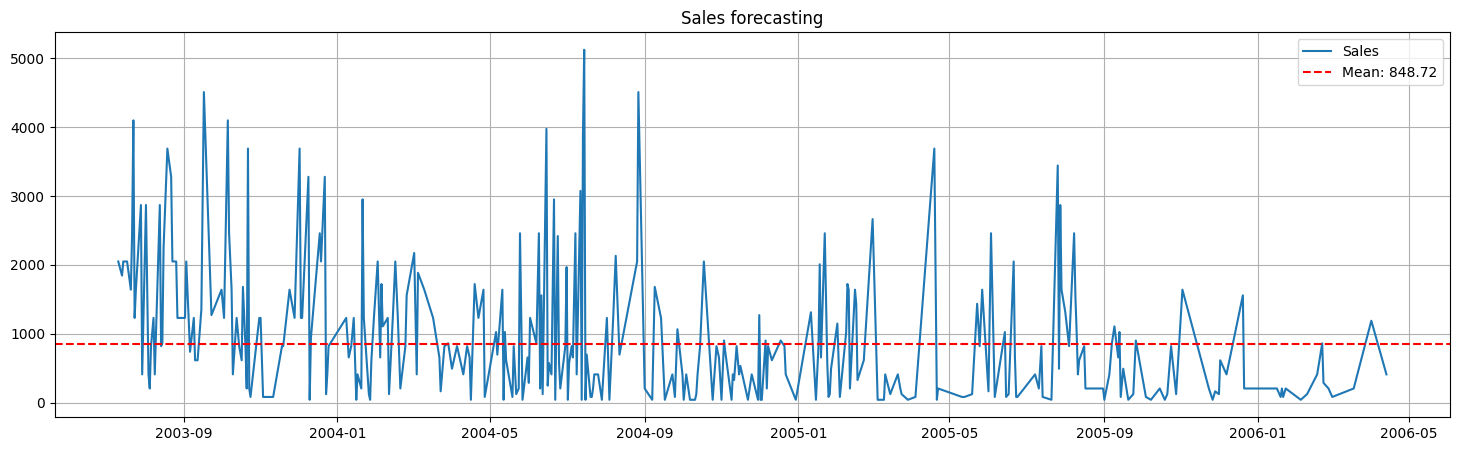

In [6]:
sales = f.demanda(df)

Percentage outliers:  3.7698412698412698


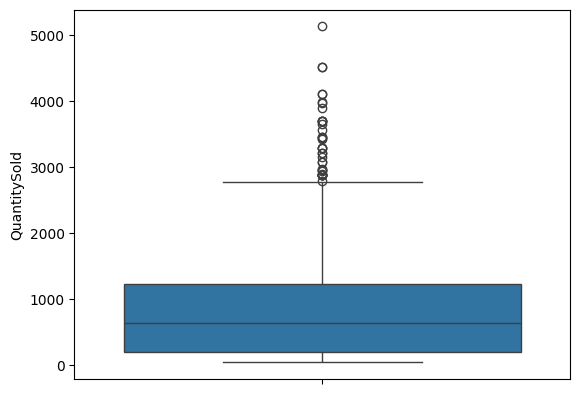

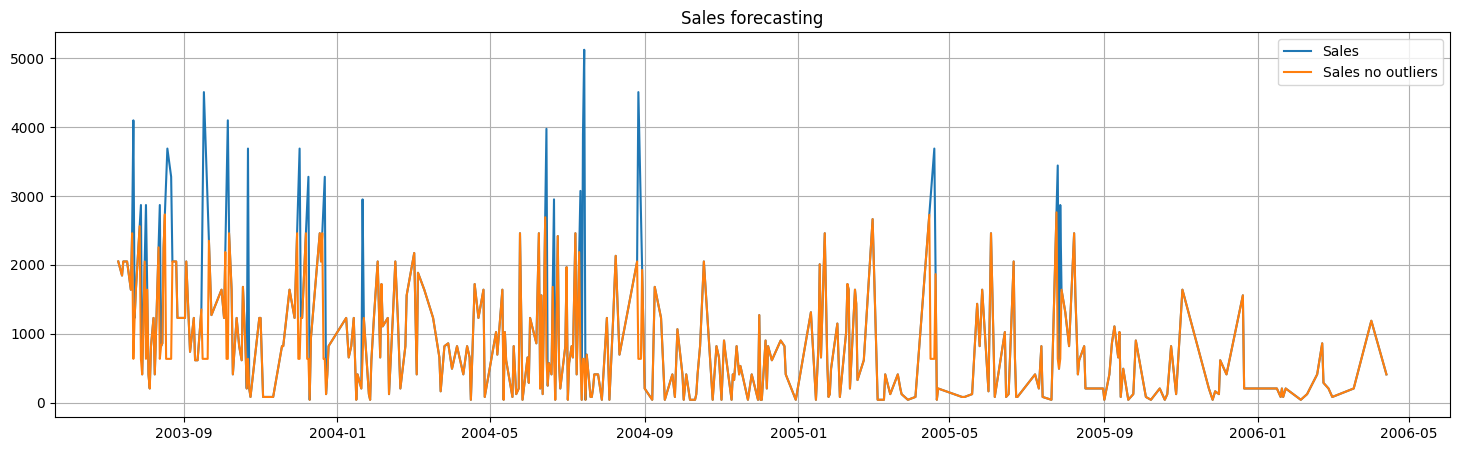

,QuantitySold
OrderDate,
2003-07-11,2050.000000
2003-07-12,1981.666667
2003-07-13,1913.333333
2003-07-14,1845.000000
2003-07-15,2050.000000
...,...
2006-04-09,669.666667
2006-04-10,604.750000
2006-04-11,539.833333


In [7]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 5.973458967758513e-25


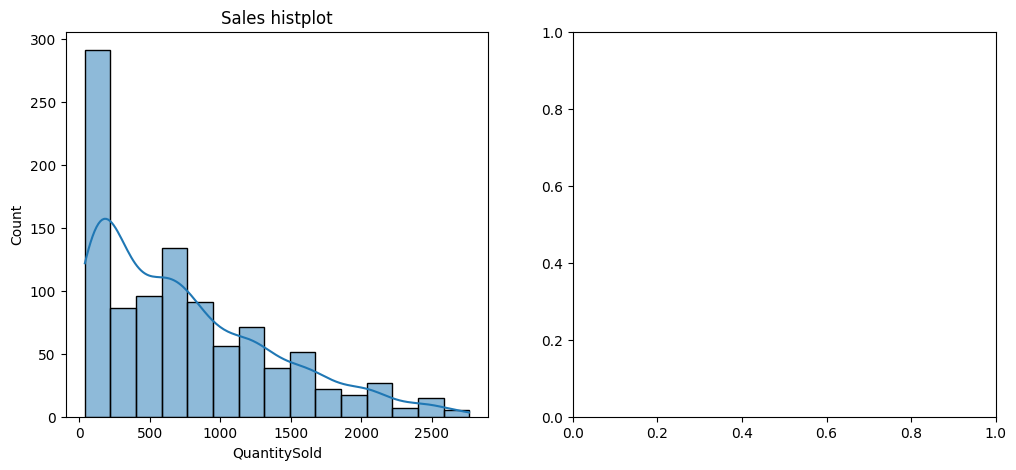

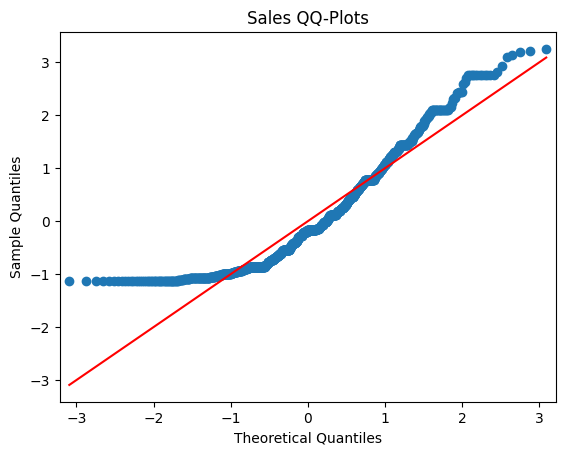

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.2767904898389381


In [8]:
sales = f.normality_study(sales)

Reordered dates: [Timestamp('2003-07-12 00:00:00'), Timestamp('2003-07-13 00:00:00'), Timestamp('2003-07-14 00:00:00'), Timestamp('2003-07-15 00:00:00'), Timestamp('2003-07-16 00:00:00'), Timestamp('2003-07-17 00:00:00'), Timestamp('2003-07-18 00:00:00'), Timestamp('2003-07-19 00:00:00'), Timestamp('2003-07-20 00:00:00'), Timestamp('2003-07-21 00:00:00'), Timestamp('2003-07-22 00:00:00'), Timestamp('2003-07-23 00:00:00'), Timestamp('2003-07-24 00:00:00'), Timestamp('2003-07-25 00:00:00'), Timestamp('2003-07-26 00:00:00'), Timestamp('2003-07-27 00:00:00'), Timestamp('2003-07-28 00:00:00'), Timestamp('2003-07-29 00:00:00'), Timestamp('2003-07-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-01 00:00:00'), Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:00

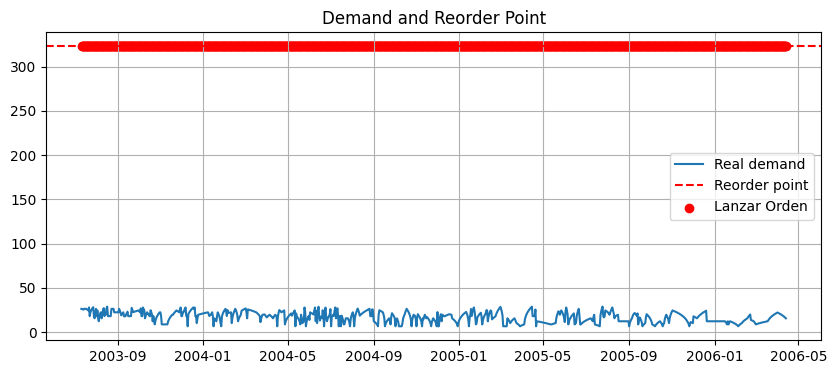

In [10]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

In [11]:
rop_por_producto

np.float64(323.1132850415594)

In [12]:
security_stocks

np.float64(294.8149222996989)

In [13]:
fechas_reposicion

DatetimeIndex(['2003-07-12', '2003-07-13', '2003-07-14', '2003-07-15',
               '2003-07-16', '2003-07-17', '2003-07-18', '2003-07-19',
               '2003-07-20', '2003-07-21',
               ...
               '2006-04-04', '2006-04-05', '2006-04-06', '2006-04-07',
               '2006-04-08', '2006-04-09', '2006-04-10', '2006-04-11',
               '2006-04-12', '2006-04-13'],
              dtype='datetime64[ns]', name='OrderDate', length=1007, freq='D')